### Small GAN MNIST

In [ ]:
import torch
from torchvision.datasets import MNIST
from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from model import Generator, Discriminator

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

batch_size = 128
latent_dim = 100
epochs = 100
lr = 2e-4

transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.1307, ), (0.3081, ))
])

mnist_dataset = MNIST(root="data", train=True, transform=transform, download=True)
mnist_dataloader = DataLoader(mnist_dataset, batch_size=batch_size)

generator = Generator(latent_dim=latent_dim)
discriminator = Discriminator()
generator.to(device)
discriminator.to(device)

gen_optimizer = torch.optim.AdamW(generator.parameters(), lr=lr)
dis_optimizer = torch.optim.AdamW(discriminator.parameters(), lr=lr)

for epoch in range(epochs):
    d_running_loss, g_running_loss = 0.0, 0.0

    for real_img, _ in mnist_dataloader:

        real_img = real_img.to(device)

        gen_optimizer.zero_grad()
        dis_optimizer.zero_grad()

        ## Generator
        z = torch.randn(real_img.shape[0], latent_dim).to(device)
        fake_imgs = generator(z)
        verdict = discriminator(fake_imgs)

        g_loss = F.binary_cross_entropy(verdict, torch.ones(real_img.shape[0], 1).to(device))
        g_loss.backward()
        gen_optimizer.step()

        ## Discriminator
        verdict = discriminator(real_img)
        real_loss = F.binary_cross_entropy(verdict, torch.ones(real_img.shape[0], 1).to(device))

        verdict = discriminator(generator(z).detach())
        fake_loss = F.binary_cross_entropy(verdict, torch.zeros(real_img.shape[0], 1).to(device))

        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        dis_optimizer.step()

        g_running_loss += g_loss / real_img.shape[0]
        d_running_loss += d_loss / real_img.shape[0]

    print(f"Epoch {epoch} \n\tDiscriminator loss: {g_running_loss / len(mnist_dataloader)} "
                        f"\n\tGenerator loss: {d_running_loss / len(mnist_dataloader)}")
    
    z = torch.randn(8, latent_dim).to(device)
    fake_imgs = generator(z)
    
    for i, fake_img in enumerate(fake_imgs):
        plt.axis('off')
        plt.subplot(1, len(fake_imgs), i+1)
        plt.imshow(fake_img.permute(1,2,0).cpu().detach().numpy(), cmap="gray")
    plt.show()

### Bigger GAN (DCGAN) CelebA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 0 
	Discriminator loss: 0.00071950803976506 
	Generator loss: 0.0014378392370417714


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


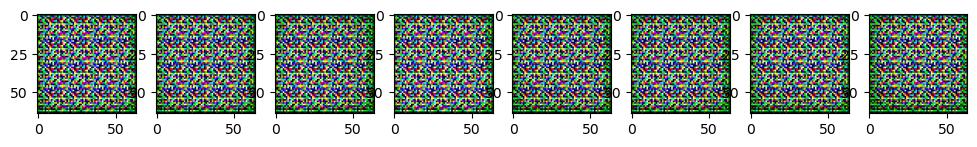

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1 
	Discriminator loss: 0.0007474101148545742 
	Generator loss: 0.0012794231297448277


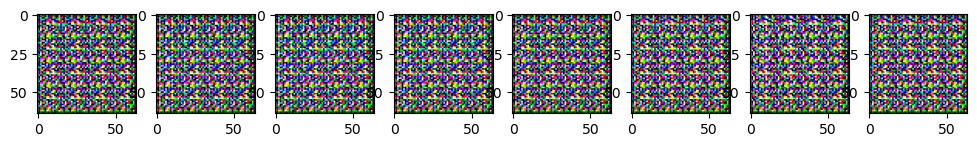

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 2 
	Discriminator loss: 0.0007673771469853818 
	Generator loss: 0.0012214465532451868


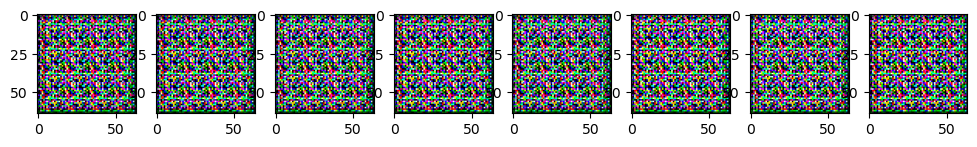

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 3 
	Discriminator loss: 0.0007707580225542188 
	Generator loss: 0.0011885277926921844


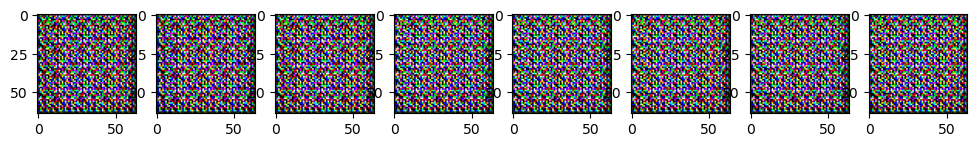

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4 
	Discriminator loss: 0.0007803525659255683 
	Generator loss: 0.0011574884410947561


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


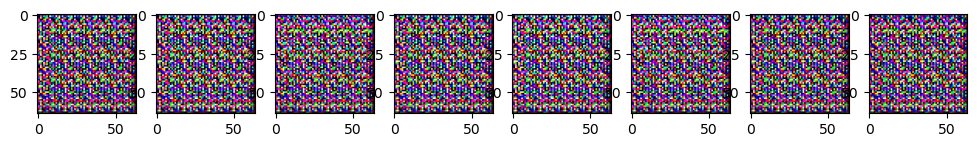

In [ ]:
import torch
# from torchvision.datasets import MNIST
from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from big_model import Generator, Discriminator
from dataset import CelebA

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

batch_size = 512
latent_dim = 100
epochs = 100
lr = 2e-4

transform = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))
])

# mnist_dataset = MNIST(root="data", train=True, transform=transform, download=True)

dataset = CelebA(root_dir="data2/celeba/img_align_celeba/", transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size)

generator = Generator(latent_dim=latent_dim, out_channel=3, width=64, height=64)
discriminator = Discriminator(in_channels=3)
generator.to(device)
discriminator.to(device)

gen_optimizer = torch.optim.AdamW(generator.parameters(), lr=lr)
dis_optimizer = torch.optim.AdamW(discriminator.parameters(), lr=lr)

for epoch in range(epochs):
    d_running_loss, g_running_loss = 0.0, 0.0

    for real_img in dataloader:

        real_img = real_img.to(device)

        gen_optimizer.zero_grad()
        dis_optimizer.zero_grad()

        ## Generator
        z = torch.randn(real_img.shape[0], latent_dim).to(device)
        fake_imgs = generator(z)
        verdict = discriminator(fake_imgs)

        g_loss = F.binary_cross_entropy(verdict, torch.ones(real_img.shape[0], 1).to(device))
        g_loss.backward()
        gen_optimizer.step()

        ## Discriminator
        verdict = discriminator(real_img)
        real_loss = F.binary_cross_entropy(verdict, torch.ones(real_img.shape[0], 1).to(device))

        verdict = discriminator(generator(z).detach())
        fake_loss = F.binary_cross_entropy(verdict, torch.zeros(real_img.shape[0], 1).to(device))

        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        dis_optimizer.step()

        g_running_loss += g_loss / real_img.shape[0]
        d_running_loss += d_loss / real_img.shape[0]

    print(f"Epoch {epoch} \n\tDiscriminator loss: {g_running_loss / len(dataloader)} "
                        f"\n\tGenerator loss: {d_running_loss / len(dataloader)}")
    
    z = torch.randn(8, latent_dim).to(device)
    fake_imgs = generator(z)
    
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    for i, fake_img in enumerate(fake_imgs):
        plt.subplot(1, len(fake_imgs), i+1)
        plt.imshow(fake_img.permute(1,2,0).cpu().detach().numpy())
    plt.show()